In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import random


In [3]:
train_link = '/kaggle/input/human-protein-atlas-image-classification/train'
test_link = '/kaggle/input/human-protein-atlas-image-classification/test'

# Understanding the data

In [4]:
protein_type =[
    (0, "Nucleoplasm"),
    (1, "Nuclear membrane"),
    (2, "Nucleoli"),
    (3, "Nucleoli fibrillar center"),
    (4, "Nuclear speckles"),
    (5, "Nuclear bodies"),
    (6, "Endoplasmic reticulum"),
    (7, "Golgi apparatus"),
    (8, "Peroxisomes"),
    (9, "Endosomes"),
    (10, "Lysosomes"),
    (11, "Intermediate filaments"),
    (12, "Actin filaments"),
    (13, "Focal adhesion sites"),
    (14, "Microtubules"),
    (15, "Microtubule ends"),
    (16, "Cytokinetic bridge"),
    (17, "Mitotic spindle"),
    (18, "Microtubule organizing center"),
    (19, "Centrosome"),
    (20, "Lipid droplets"),
    (21, "Plasma membrane"),
    (22, "Cell junctions"),
    (23, "Mitochondria"),
    (24, "Aggresome"),
    (25, "Cytosol"),
    (26, "Cytoplasmic bodies"),
    (27, "Rods & rings")
]
protein_dict = {name: index for index, name in protein_type}


In [5]:
protein_dict

{'Nucleoplasm': 0,
 'Nuclear membrane': 1,
 'Nucleoli': 2,
 'Nucleoli fibrillar center': 3,
 'Nuclear speckles': 4,
 'Nuclear bodies': 5,
 'Endoplasmic reticulum': 6,
 'Golgi apparatus': 7,
 'Peroxisomes': 8,
 'Endosomes': 9,
 'Lysosomes': 10,
 'Intermediate filaments': 11,
 'Actin filaments': 12,
 'Focal adhesion sites': 13,
 'Microtubules': 14,
 'Microtubule ends': 15,
 'Cytokinetic bridge': 16,
 'Mitotic spindle': 17,
 'Microtubule organizing center': 18,
 'Centrosome': 19,
 'Lipid droplets': 20,
 'Plasma membrane': 21,
 'Cell junctions': 22,
 'Mitochondria': 23,
 'Aggresome': 24,
 'Cytosol': 25,
 'Cytoplasmic bodies': 26,
 'Rods & rings': 27}

In [6]:
traincsv = '/kaggle/input/human-protein-atlas-image-classification/train.csv'
dtrain = pd.read_csv(traincsv)

In [7]:
dtrain.head()

Id   Target
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18

In [8]:
protein_target = []
for e in dtrain['Target']:

    temp = []
    for ec in e.split():
        
        ec = int(ec)    #because it was stored in string
        for k,v in protein_dict.items():
            if v == ec:
                temp.append(k)
    protein_target.append(','.join(temp)) #writing like Golgi apparatus, Nuclear membrane, Nucleoli, Nucleoplasm

dtrain['Target_Protein'] = protein_target
   

In [9]:
dtrain.head(10)

Id   Target  \
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0   
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0   
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5   
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1   
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18   
5  001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0        0   
6  0020af02-bbba-11e8-b2ba-ac1f6b6435d0     25 2   
7  002679c2-bbb6-11e8-b2ba-ac1f6b6435d0        0   
8  00285ce4-bba0-11e8-b2b9-ac1f6b6435d0      2 0   
9  002daad6-bbc9-11e8-b2bc-ac1f6b6435d0        7   

                                      Target_Protein  
0                     Cytokinetic bridge,Nucleoplasm  
1  Golgi apparatus,Nuclear membrane,Nucleoli,Nucl...  
2                                     Nuclear bodies  
3                                   Nuclear membrane  
4                      Microtubule organizing center  
5                                        Nucleoplasm  
6                                   Cytosol,Nucleoli  
7                                        Nucleoplasm  
8                               Nucleoli,Nucleoplasm  
9                                    Golgi apparatus

In [10]:
print(dtrain.columns)
print(len(dtrain.columns))

Index(['Id', 'Target', 'Target_Protein'], dtype='object')
3


In [11]:
#writing the columns with protein type in the same order with protein_dict
for col in protein_dict.keys():
    dtrain[col] = 0

In [12]:
#here we can see columns as the number of protein types. also i need to make them initialize with zero that refers not existing
dtrain.head(10)

Id   Target  \
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0   
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0   
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5   
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1   
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18   
5  001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0        0   
6  0020af02-bbba-11e8-b2ba-ac1f6b6435d0     25 2   
7  002679c2-bbb6-11e8-b2ba-ac1f6b6435d0        0   
8  00285ce4-bba0-11e8-b2b9-ac1f6b6435d0      2 0   
9  002daad6-bbc9-11e8-b2bc-ac1f6b6435d0        7   

                                      Target_Protein  Nucleoplasm  \
0                     Cytokinetic bridge,Nucleoplasm            0   
1  Golgi apparatus,Nuclear membrane,Nucleoli,Nucl...            0   
2                                     Nuclear bodies            0   
3                                   Nuclear membrane            0   
4                      Microtubule organizing center            0   
5                                        Nucleoplasm            0   
6                                   Cytosol,Nucleoli            0   
7                                        Nucleoplasm            0   
8                               Nucleoli,Nucleoplasm            0   
9                                    Golgi apparatus            0   

   Nuclear membrane  Nucleoli  Nucleoli fibrillar center  Nuclear speckles  \
0                 0         0                          0                 0   
1                 0         0                          0                 0   
2                 0         0                          0                 0   
3                 0         0                          0                 0   
4                 0         0                          0                 0   
5                 0         0                          0                 0   
6                 0         0                          0                 0   
7                 0         0                          0                 0   
8                 0         0                          0                 0   
9                 0         0                          0                 0   

   Nuclear bodies  Endoplasmic reticulum  ...  Microtubule organizing center  \
0               0                      0  ...                              0   
1               0                      0  ...                              0   
2               0                      0  ...                              0   
3               0                      0  ...                              0   
4               0                      0  ...                              0   
5               0                      0  ...                              0   
6               0                      0  ...                              0   
7               0                      0  ...                              0   
8               0                      0  ...                              0   
9               0                      0  ...                              0   

   Centrosome  Lipid droplets  Plasma membrane  Cell junctions  Mitochondria  \
0           0               0                0               0             0   
1           0               0                0               0             0   
2           0               0                0               0             0   
3           0               0                0               0             0   
4           0               0                0               0             0   
5           0               0                0               0             0   
6           0               0                0               0             0   
7           0               0                0               0             0   
8           0               0                0               0             0   
9           0               0                0               0             0   

   Aggresome  Cytosol  Cytoplasmic bodies  Rods & rings  
0          0        0    

In [13]:
#lets fill them acc to targets. if it exists, the one existed is 1, the rest is 0s.
for index,targets in enumerate(dtrain['Target_Protein']):
    targets = targets.split(',')
    for each in targets:
        dtrain.loc[index,each] = 1

In [14]:
dtrain.head(10)

Id   Target  \
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0   
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0   
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5   
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1   
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18   
5  001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0        0   
6  0020af02-bbba-11e8-b2ba-ac1f6b6435d0     25 2   
7  002679c2-bbb6-11e8-b2ba-ac1f6b6435d0        0   
8  00285ce4-bba0-11e8-b2b9-ac1f6b6435d0      2 0   
9  002daad6-bbc9-11e8-b2bc-ac1f6b6435d0        7   

                                      Target_Protein  Nucleoplasm  \
0                     Cytokinetic bridge,Nucleoplasm            1   
1  Golgi apparatus,Nuclear membrane,Nucleoli,Nucl...            1   
2                                     Nuclear bodies            0   
3                                   Nuclear membrane            0   
4                      Microtubule organizing center            0   
5                                        Nucleoplasm            1   
6                                   Cytosol,Nucleoli            0   
7                                        Nucleoplasm            1   
8                               Nucleoli,Nucleoplasm            1   
9                                    Golgi apparatus            0   

   Nuclear membrane  Nucleoli  Nucleoli fibrillar center  Nuclear speckles  \
0                 0         0                          0                 0   
1                 1         1                          0                 0   
2                 0         0                          0                 0   
3                 1         0                          0                 0   
4                 0         0                          0                 0   
5                 0         0                          0                 0   
6                 0         1                          0                 0   
7                 0         0                          0                 0   
8                 0         1                          0                 0   
9                 0         0                          0                 0   

   Nuclear bodies  Endoplasmic reticulum  ...  Microtubule organizing center  \
0               0                      0  ...                              0   
1               0                      0  ...                              0   
2               1                      0  ...                              0   
3               0                      0  ...                              0   
4               0                      0  ...                              1   
5               0                      0  ...                              0   
6               0                      0  ...                              0   
7               0                      0  ...                              0   
8               0                      0  ...                              0   
9               0                      0  ...                              0   

   Centrosome  Lipid droplets  Plasma membrane  Cell junctions  Mitochondria  \
0           0               0                0               0             0   
1           0               0                0               0             0   
2           0               0                0               0             0   
3           0               0                0               0             0   
4           0               0                0               0             0   
5           0               0                0               0             0   
6           0               0                0               0             0   
7           0               0                0               0             0   
8           0               0                0               0             0   
9           0               0                0               0             0   

   Aggresome  Cytosol  Cytoplasmic bodies  Rods & rings  
0          0        0    

In [15]:
protein_col = dtrain.columns
protein_col=protein_col.drop(['Id','Target','Target_Protein'])
number_of_protein = dtrain[protein_col].sum().to_dict()

In [16]:
pd_protein_number =pd.DataFrame(number_of_protein.items(),columns=['Protein','Number'])
pd_protein_number.head(5)

Protein  Number
0                Nucleoplasm   12885
1           Nuclear membrane    1254
2                   Nucleoli    3621
3  Nucleoli fibrillar center    1561
4           Nuclear speckles    1858

In [17]:
cnt = 0
for s in pd_protein_number['Number']:
    cnt +=s 
print(cnt)

50782


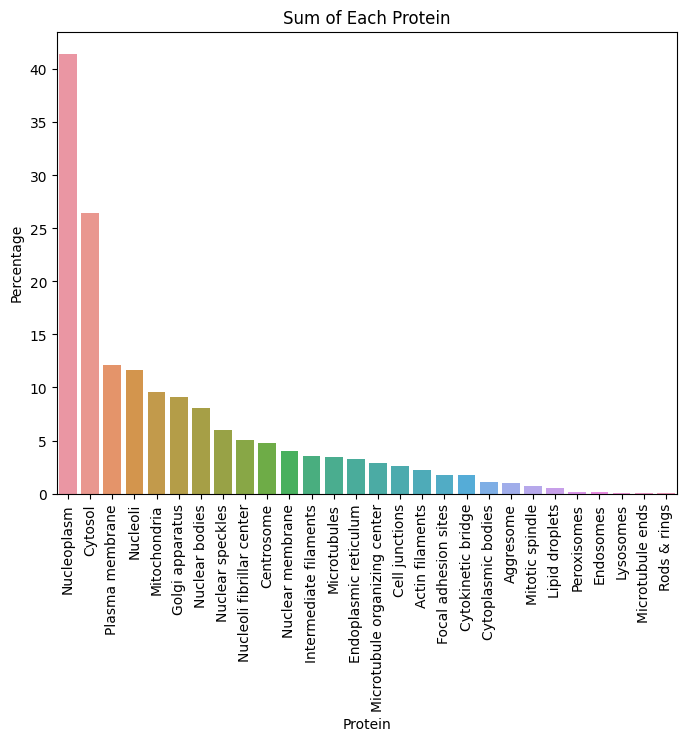

In [18]:
pd_protein_number_sorted=pd_protein_number.sort_values(by='Number',ascending = False)
pd_protein_number_sorted.head(5)

pd_protein_number_sorted['Percentage'] = round(pd_protein_number_sorted['Number']/dtrain.shape[0]*100,2)

#plotting it with percentage:
plt.figure(figsize = (8,6))

sns.barplot(x='Protein',y='Percentage',data= pd_protein_number_sorted)
plt.xticks(rotation=90)
plt.title('Sum of Each Protein')
plt.show()

In [19]:
pd_protein_number_sorted.head(10)

Protein  Number  Percentage
0                 Nucleoplasm   12885       41.47
25                    Cytosol    8228       26.48
21            Plasma membrane    3777       12.16
2                    Nucleoli    3621       11.65
23               Mitochondria    2965        9.54
7             Golgi apparatus    2822        9.08
5              Nuclear bodies    2513        8.09
4            Nuclear speckles    1858        5.98
3   Nucleoli fibrillar center    1561        5.02
19                 Centrosome    1482        4.77

> Keynotes: We can see easily that the data was not distributed fairly. In order to make the model introduce the low number of protein, I need to make data augmentation so that the image with low number protein is augmented.

In [20]:
no_target = []
target_list = dtrain['Target']
for target in target_list:
    no_target.append(len(target.split()))
dtrain['No_of_Protein'] = no_target

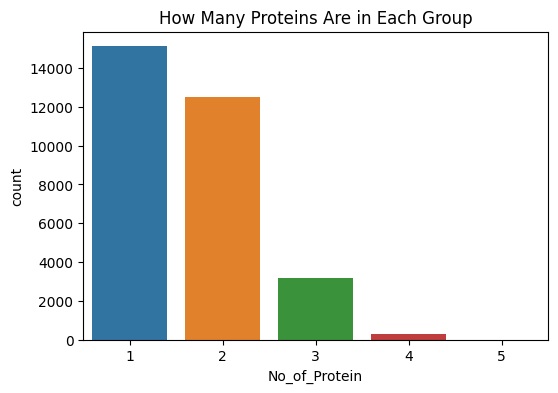

In [21]:
a=dtrain['No_of_Protein'].value_counts().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='No_of_Protein',y='count',data= a)
plt.title('How Many Proteins Are in Each Group')
plt.show()

In [22]:
#fetching the images from train folder:
train_files = []
train_link = '/kaggle/input/human-protein-atlas-image-classification/train'

for dirname, _, filenames in os.walk(train_link):
    for filename in filenames:
        filename=(os.path.join(dirname, filename))
        train_files.append(filename)

In [23]:
print('the number of image in train folder: ',len(train_files))
print('the number of id in train.csv',len(dtrain['Id']))
print('example:',train_files[0])

the number of image in train folder:  124288
the number of id in train.csv 31072
example: /kaggle/input/human-protein-atlas-image-classification/train/5e3a2e6a-bb9c-11e8-b2b9-ac1f6b6435d0_red.png


In [24]:
#fetching the images from test folder:
test_link = '/kaggle/input/human-protein-atlas-image-classification/test' 
testcsv = '/kaggle/input/human-protein-atlas-image-classification/sample_submission.csv'
test_files = []

dtest = pd.read_csv(testcsv)

for dirname, _, filenames in os.walk(test_link):
    for filename in filenames:
        filename=(os.path.join(dirname, filename))
        test_files.append(filename)

print('the number of image in test folder: ',len(test_files))
print('the number of id in test.csv',len(dtest['Id']))
print('example:',test_files[0])

the number of image in test folder:  46808
the number of id in test.csv 11702
example: /kaggle/input/human-protein-atlas-image-classification/test/6aa64ed4-bacc-11e8-b2b8-ac1f6b6435d0_yellow.png


In [25]:
dtest['Id']

0        00008af0-bad0-11e8-b2b8-ac1f6b6435d0
1        0000a892-bacf-11e8-b2b8-ac1f6b6435d0
2        0006faa6-bac7-11e8-b2b7-ac1f6b6435d0
3        0008baca-bad7-11e8-b2b9-ac1f6b6435d0
4        000cce7e-bad4-11e8-b2b8-ac1f6b6435d0
                         ...                 
11697    ffdfb96a-bad4-11e8-b2b8-ac1f6b6435d0
11698    ffdfc590-bad4-11e8-b2b8-ac1f6b6435d0
11699    ffecb8a4-bad4-11e8-b2b8-ac1f6b6435d0
11700    fff03816-bad5-11e8-b2b9-ac1f6b6435d0
11701    fffe6f9c-bacd-11e8-b2b8-ac1f6b6435d0
Name: Id, Length: 11702, dtype: object

In [26]:
11702*4

46808

**Important that test_files includes only image names. In dataset and dataloader, _green,_blue,_yellow and _red part will be merged there, not here!**

> Total images in test folder is 46808
> 
> Total image name in test_files is 11702
> 
> I am on the correct way now.

## Co-Occurence of Data

protein_col = Index(['Nucleoplasm', 'Nuclear membrane', 'Nucleoli',
       'Nucleoli fibrillar center', 'Nuclear speckles', 'Nuclear bodies',
       'Endoplasmic reticulum', 'Golgi apparatus', 'Peroxisomes', 'Endosomes',
       'Lysosomes', 'Intermediate filaments', 'Actin filaments',
       'Focal adhesion sites', 'Microtubules', 'Microtubule ends',
       'Cytokinetic bridge', 'Mitotic spindle',
       'Microtubule organizing center', 'Centrosome', 'Lipid droplets',
       'Plasma membrane', 'Cell junctions', 'Mitochondria', 'Aggresome',
       'Cytosol', 'Cytoplasmic bodies', 'Rods & rings'],
      dtype='object')

In [27]:
protein_df = dtrain[protein_col]

In [28]:
protein_df

Nucleoplasm  Nuclear membrane  Nucleoli  Nucleoli fibrillar center  \
0                1                 0         0                          0   
1                1                 1         1                          0   
2                0                 0         0                          0   
3                0                 1         0                          0   
4                0                 0         0                          0   
...            ...               ...       ...                        ...   
31067            0                 0         0                          0   
31068            0                 0         0                          0   
31069            0                 0         0                          0   
31070            0                 0         1                          0   
31071            1                 0         1                          0   

       Nuclear speckles  Nuclear bodies  Endoplasmic reticulum  \
0                     0               0                      0   
1                     0               0                      0   
2                     0               1                      0   
3                     0               0                      0   
4                     0               0                      0   
...                 ...             ...                    ...   
31067                 0               0                      0   
31068                 0               1                      0   
31069                 0               0                      0   
31070                 0               0                      0   
31071                 0               0                      0   

       Golgi apparatus  Peroxisomes  Endosomes  ...  \
0                    0            0          0  ...   
1                    1            0          0  ...   
2                    0            0          0  ...   
3                    0            0          0  ...   
4                    0            0          0  ...   
...                ...          ...        ...  ...   
31067                0            0          0  ...   
31068                0            0          0  ...   
31069                1            0          0  ...   
31070                0            0          0  ...   
31071                0            0          0  ...   

       Microtubule organizing center  Centrosome  Lipid droplets  \
0                                  0           0               0   
1                                  0           0               0   
2                                  0           0               0   
3                                  0           0               0   
4                                  1           0               0   
...                              ...         ...             ...   
31067                              0           0               0   
31068                              0           0               0   
31069                              0           0               0   
31070                              0           0               0   
31071                              0           0               0   

       Plasma membrane  Cell junctions  Mitochondria  Aggresome  Cytosol  \
0                    0               0             0          0        0   
1                    0               0             0          0        0   
2                    0               0             0          0        0   
3                    0               0             0          0        0   
4                    0               0             0          0        0   
...                ...             ...           ...        ...      ...   
31067                1               0             0          0        0   
31068                0               0             0          0        0   
31069                0               0             0          0        0   
31070                1               0             

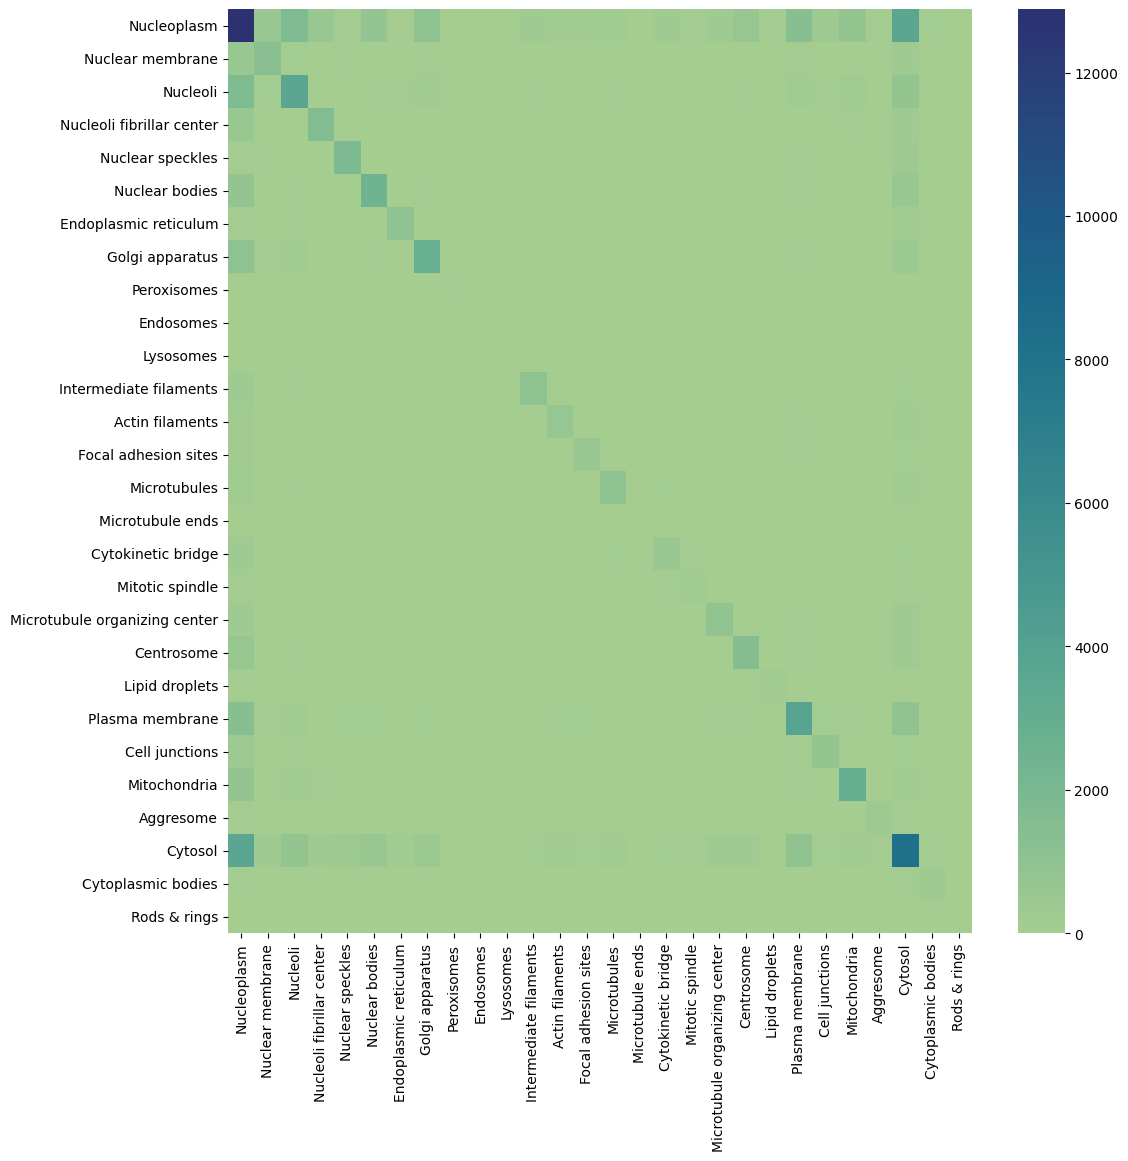

In [29]:
# Calculate co-occurrence matrix
co_occurrence = np.dot(protein_df.T, protein_df) #generic dot operations by numpy, but it is generic summary. i need ot make it normalize by protein_df.values.sum()
co_occurence_norm = co_occurrence/( protein_df.values.sum())
co_occ_df = pd.DataFrame(co_occurrence,index = protein_col, columns = protein_col)


plt.figure(figsize=(12,12))
sns.heatmap(co_occ_df,annot=False,cmap = 'crest') #fmt=".1f"
plt.show()


**WHY Protein_1 vs Protein_1 is not 1 or max,here is the answer:**

> Takeaways: **the cells in diagonal** are expected to be 1. But the heatmap above also shows the density. If you can see protein_x in x axis and the same protein in y axis, some cell is light green while some is dark green. It shows that dark green refers how intense the protein is and vice versa. You can see the example below: A is more often than B. That's why, co-occurence matrix shows A intersection is 5 while B intersection is 4.

In [30]:
data = {
    'Protein_A': [1, 1, 1, 1, 1],
    'Protein_B': [0, 1, 1, 1, 1],
    'Protein_C': [1, 0, 1, 0, 0]}
df = pd.DataFrame(data)
print(df.head(5))

# Calculate co-occurrence matrix
try_1 = np.dot(df.T, df)
co_try_1 = pd.DataFrame(try_1, index=df.columns, columns=df.columns)

print(co_try_1)

   Protein_A  Protein_B  Protein_C
0          1          0          1
1          1          1          0
2          1          1          1
3          1          1          0
4          1          1          0
           Protein_A  Protein_B  Protein_C
Protein_A          5          4          2
Protein_B          4          4          1
Protein_C          2          1          2


## Showing some images with labels:

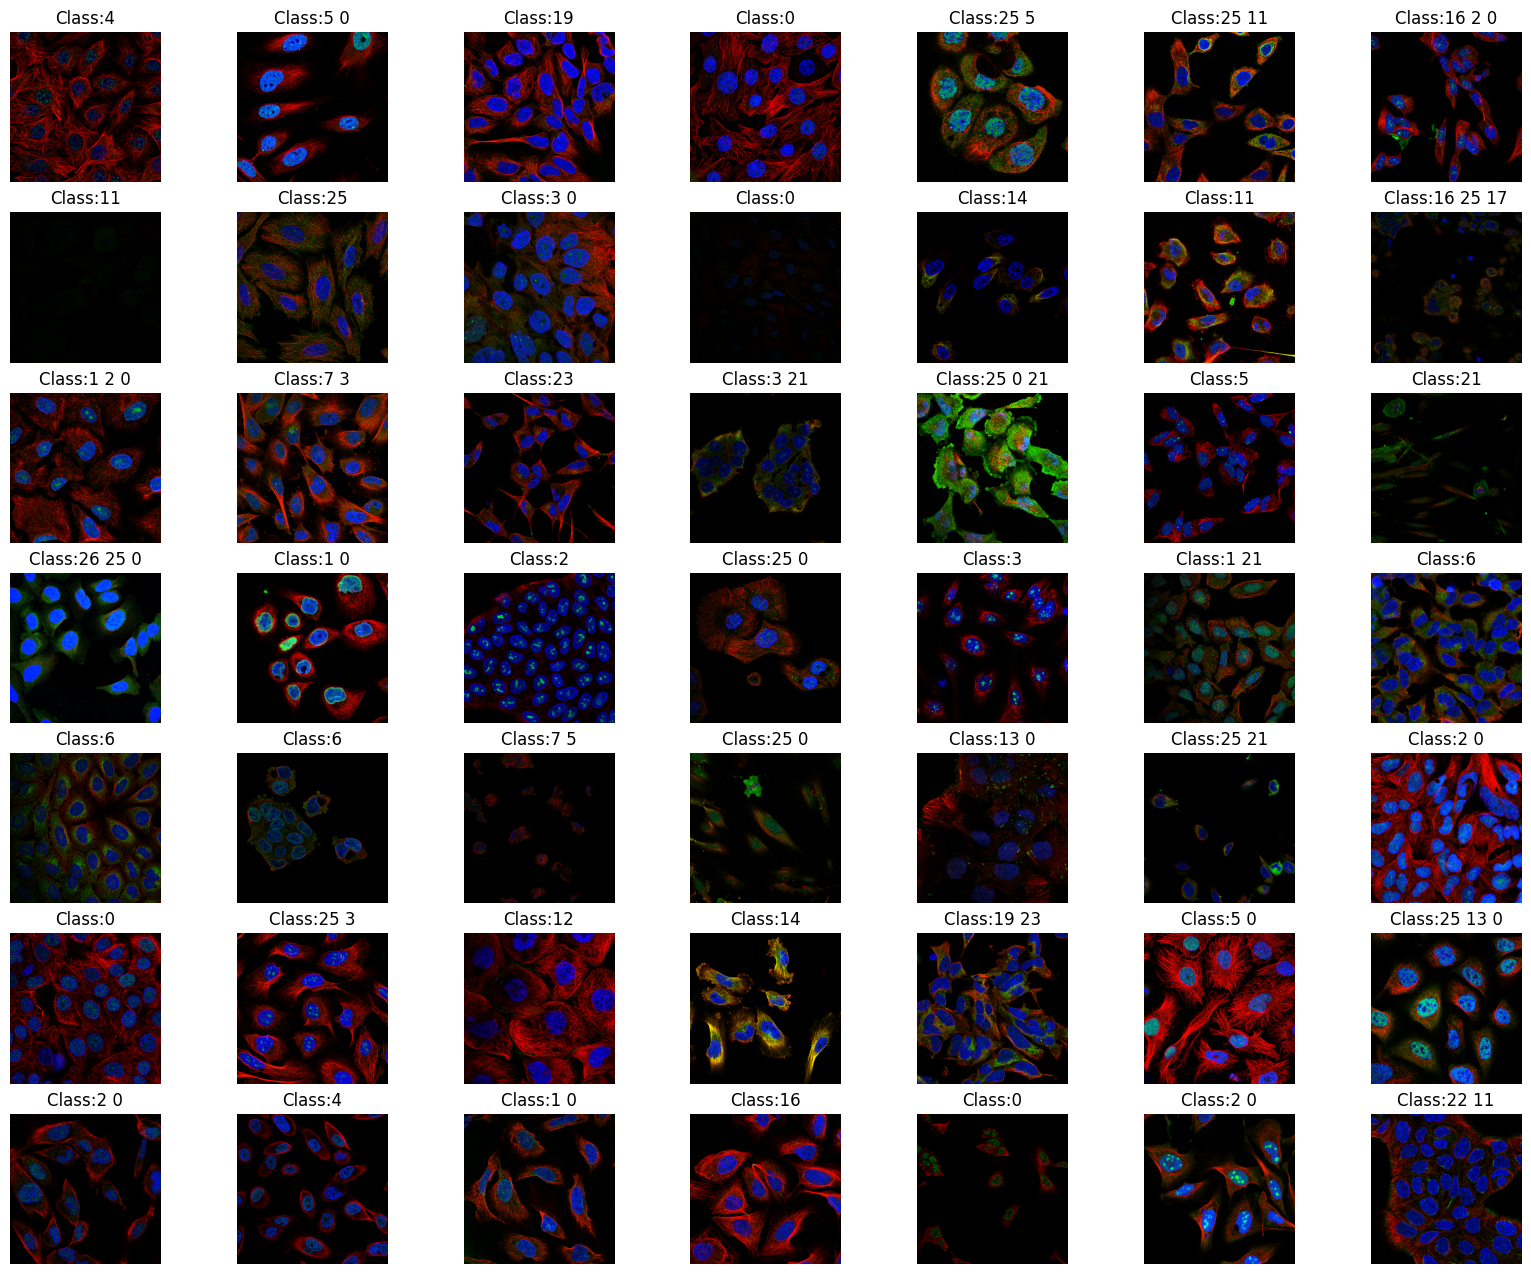

In [31]:
color_arr = ['_red.png','_green.png','_blue.png','_yellow.png'] #Sequence: RGBY
tmp = 0
cnt_nmb = 7
fig, ax = plt.subplots(cnt_nmb,cnt_nmb,figsize = (20,16))

for i in range(cnt_nmb):
    for j in range(cnt_nmb):
        tmp = random.randint(0, dtrain.shape[0])
        img_name = dtrain['Id'][tmp]
        title = 'Class:'+ dtrain['Target'][tmp]
        link = os.path.join(train_link,img_name)
        each_image = [] # will store 4 channels here
        
        for idx,c in enumerate (color_arr):
            c_link = link + c
            #print(c_link)
            a = cv2.imread(c_link)
            a = cv2.cvtColor(a,cv2.COLOR_BGR2GRAY)  #in order to put them into RGB sequence of final image
            each_image.append(a)
            
        each_image= np.array(each_image)
        k = each_image.transpose()
        ax[i][j].imshow(k[:,:,:3])
        ax[i][j].axis('off')
        title = title
        ax[i][j].set_title(title)   

        tmp +=1 #classic counter that will give an index to dtrain 
    

np.clip(value,min,max):
* Any value less than 0 is set to 0, and any value greater than 255 is set to 255.
* 
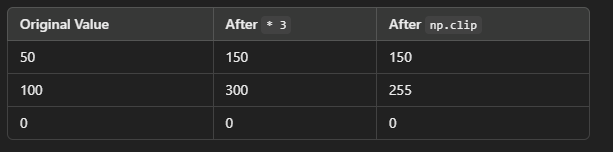

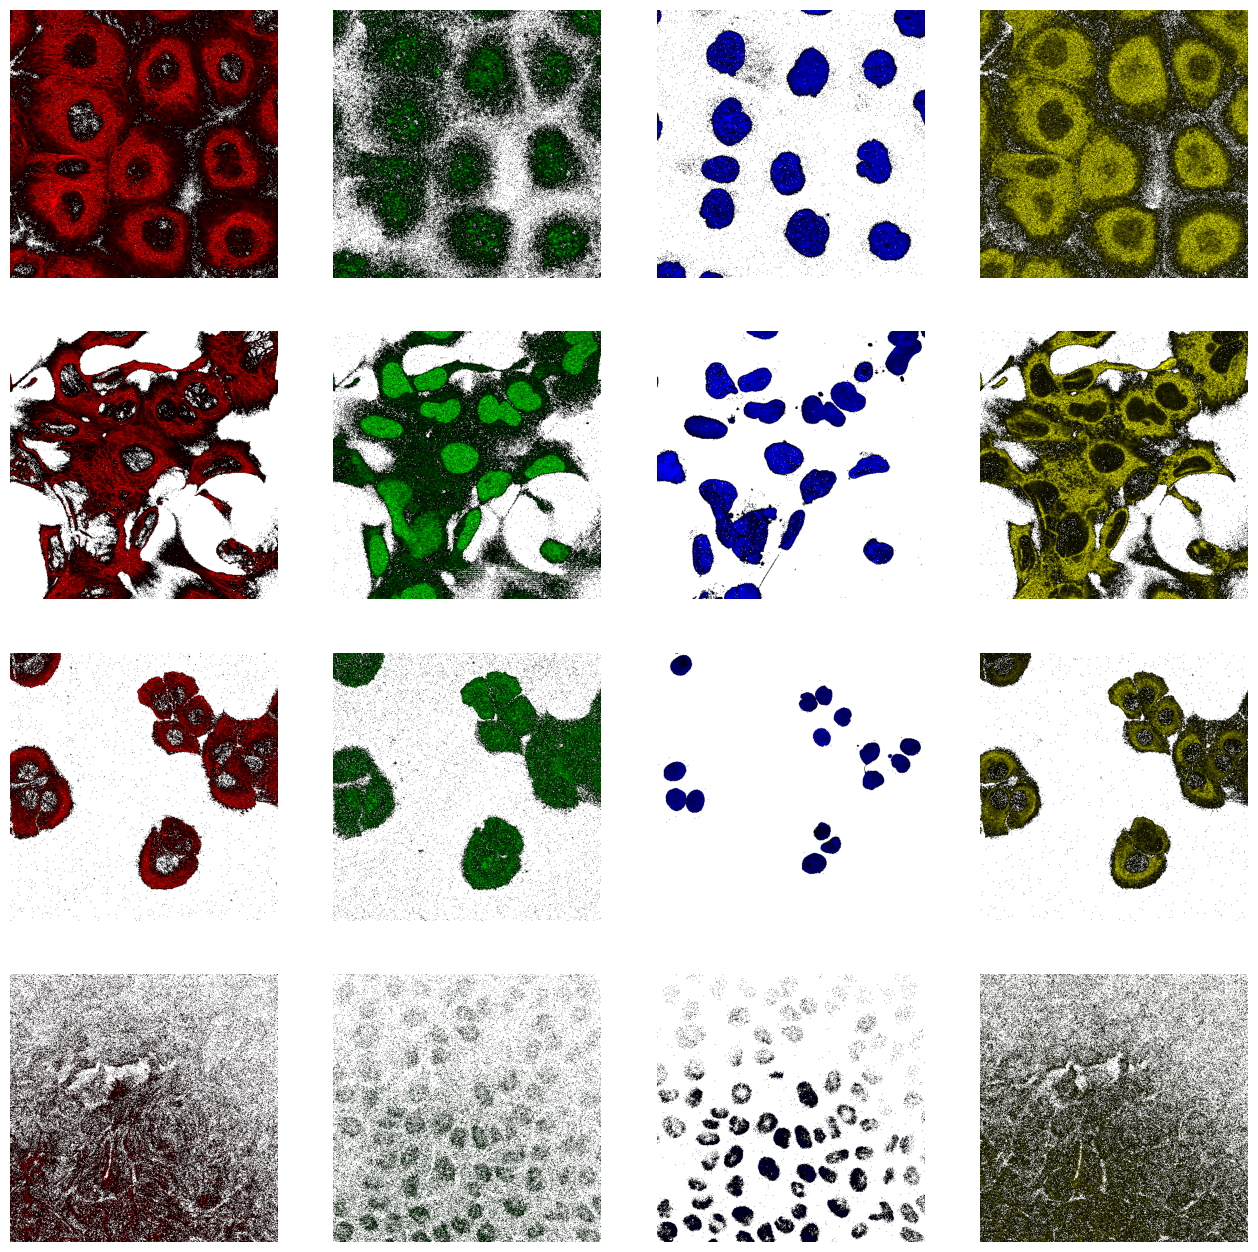

In [32]:
fig,ax = plt.subplots(4,4,figsize = (16,16))

for i in range(4):
    cnt = random.randint(0,dtrain.shape[0])
    img_linked = os.path.join(train_link,dtrain['Id'][cnt])

    for j, c in enumerate(color_arr):
        img_link = img_linked + c  #_color will add to the end
        #print('sss',img_link)
        img = cv2.imread(img_link)
        imaj = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        imaj = imaj.copy()
        
        if c == '_red.png':
            imaj[:,:,0] = np.clip(imaj[:,:,0]*2,0,255)
            imaj[:,:,1] = 0 #GREEN -- 0
            imaj[:,:,2] = 0 #BLUE -- 0     

        elif c == '_green.png':
            imaj[:,:,0] = 0 #RED -- 0
            imaj[:,:,1] = np.clip(imaj[:,:,1]*2,0,255)
            imaj[:,:,2] = 0 #BLUE -- 0     

        elif c == '_blue.png':
            imaj[:,:,0] = 0 #RED -- 0
            imaj[:,:,1] = 0 #GREEN -- 0
            imaj[:,:,2] = np.clip(imaj[:,:,2]*2,0,255)

        else:  #YELLOW -- RED and GREEN
            imaj[:,:,0] = np.clip(imaj[:,:,0]*2,0,255)
            imaj[:,:,1] = np.clip(imaj[:,:,1]*2,0,255)
            imaj[:,:,2] = 0 #BLUE -- 0

        #black_mask:
        black_mask_out = (imaj[:,:,0] == 0) & (imaj[:,:,1] == 0) & (imaj[:,:,2] == 0)
        #make black white:
        imaj[black_mask_out] = [255,255,255] #SET THEM 255,255,255 WHICH IS WHITE

        ax[i][j].axis('off')     
        ax[i][j].imshow(imaj)
        

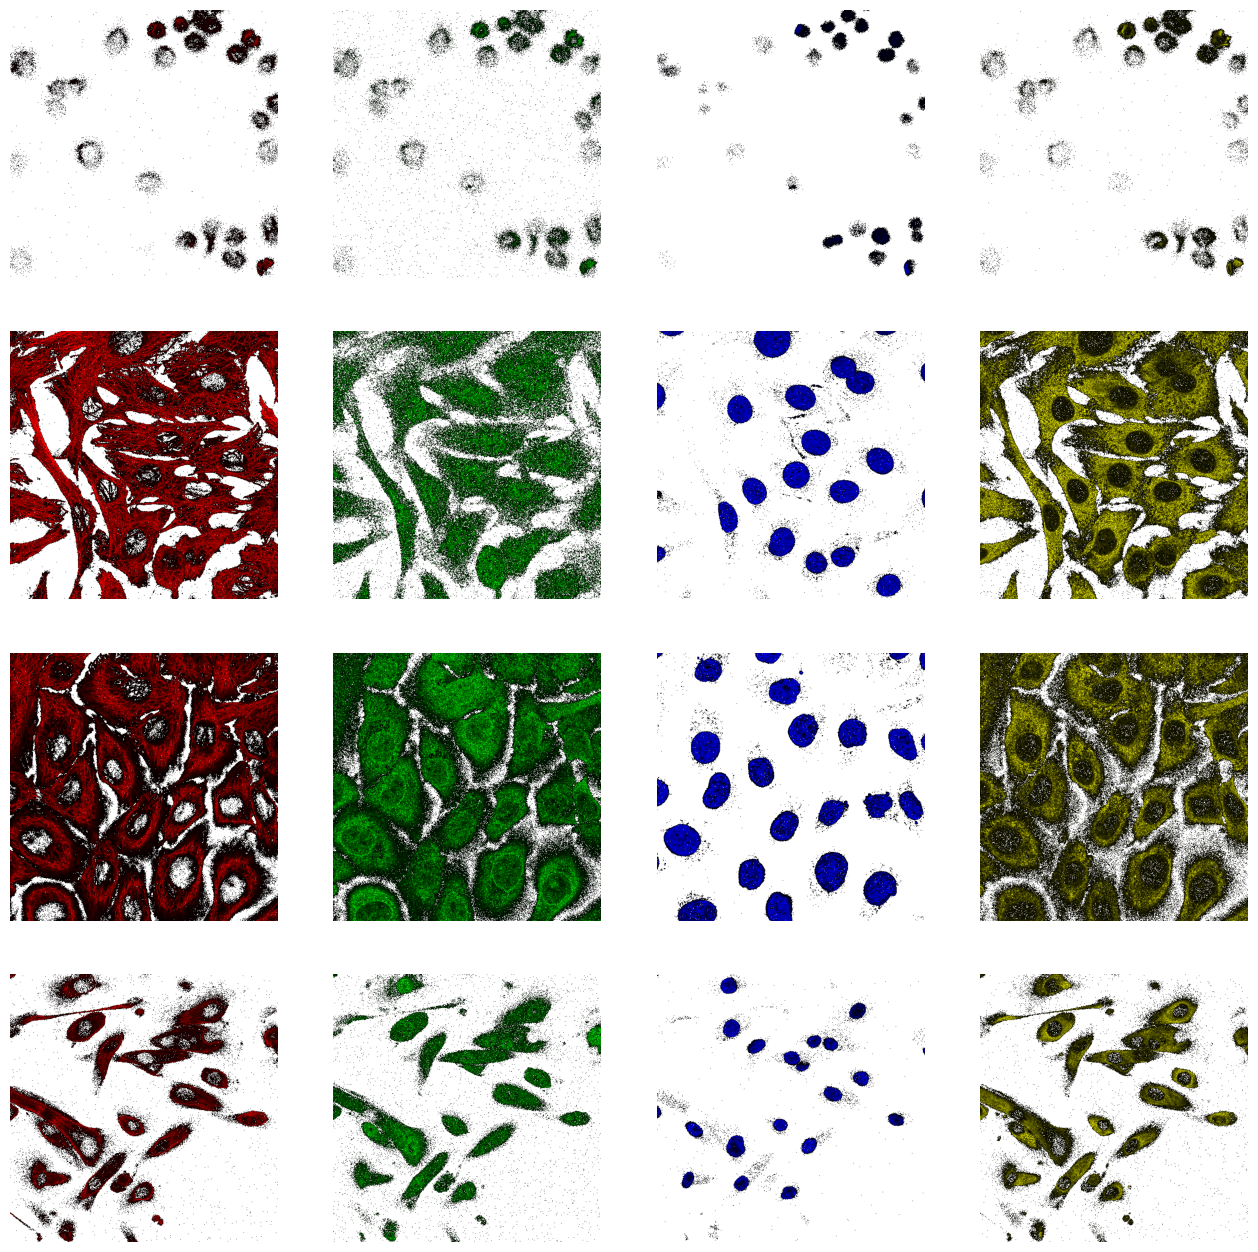

In [33]:
fig,ax = plt.subplots(4,4,figsize = (16,16))

for i in range(4):
    cnt = random.randint(0,dtest.shape[0])
    img_linked = os.path.join(test_link,dtest['Id'][cnt])

    for j, c in enumerate(color_arr):
        img_link = img_linked + c  #_color will add to the end
        #print('sss',img_link)
        img = cv2.imread(img_link)
        imaj = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        imaj = imaj.copy()
        
        if c == '_red.png':
            imaj[:,:,0] = np.clip(imaj[:,:,0]*2,0,255)
            imaj[:,:,1] = 0 #GREEN -- 0
            imaj[:,:,2] = 0 #BLUE -- 0     

        elif c == '_green.png':
            imaj[:,:,0] = 0 #RED -- 0
            imaj[:,:,1] = np.clip(imaj[:,:,1]*2,0,255)
            imaj[:,:,2] = 0 #BLUE -- 0     

        elif c == '_blue.png':
            imaj[:,:,0] = 0 #RED -- 0
            imaj[:,:,1] = 0 #GREEN -- 0
            imaj[:,:,2] = np.clip(imaj[:,:,2]*2,0,255)

        else:  #YELLOW -- RED and GREEN
            imaj[:,:,0] = np.clip(imaj[:,:,0]*2,0,255)
            imaj[:,:,1] = np.clip(imaj[:,:,1]*2,0,255)
            imaj[:,:,2] = 0 #BLUE -- 0

        #black_mask:
        black_mask_out = (imaj[:,:,0] == 0) & (imaj[:,:,1] == 0) & (imaj[:,:,2] == 0)
        #make black white:
        imaj[black_mask_out] = [255,255,255] #SET THEM 255,255,255 WHICH IS WHITE

        ax[i][j].axis('off')     
        ax[i][j].imshow(imaj)
        

**Important note:** each id has 4 different images like red,green,yellow,blue 

In [34]:
#drop the no_of_protein from the data, because it is no needed here anymore.
dtrain=dtrain.drop(['No_of_Protein'],axis = 1)

In [35]:
dtrain.head()

Id   Target  \
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0   
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0   
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5   
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1   
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18   

                                      Target_Protein  Nucleoplasm  \
0                     Cytokinetic bridge,Nucleoplasm            1   
1  Golgi apparatus,Nuclear membrane,Nucleoli,Nucl...            1   
2                                     Nuclear bodies            0   
3                                   Nuclear membrane            0   
4                      Microtubule organizing center            0   

   Nuclear membrane  Nucleoli  Nucleoli fibrillar center  Nuclear speckles  \
0                 0         0                          0                 0   
1                 1         1                          0                 0   
2                 0         0                          0                 0   
3                 1         0                          0                 0   
4                 0         0                          0                 0   

   Nuclear bodies  Endoplasmic reticulum  ...  Microtubule organizing center  \
0               0                      0  ...                              0   
1               0                      0  ...                              0   
2               1                      0  ...                              0   
3               0                      0  ...                              0   
4               0                      0  ...                              1   

   Centrosome  Lipid droplets  Plasma membrane  Cell junctions  Mitochondria  \
0           0               0                0               0             0   
1           0               0                0               0             0   
2           0               0                0               0             0   
3           0               0                0               0             0   
4           0               0                0               0             0   

   Aggresome  Cytosol  Cytoplasmic bodies  Rods & rings  
0          0        0                   0             0  
1          0        0                   0             0  
2          0        0                   0             0  
3          0        0                   0             0  
4          0        0                   0             0  

[5 rows x 31 columns]

# Data Processing

*Important Info*: 
- X, Y, Z and C. X and Y will be the two sides of a two dimensional image. 
- Z will be the third side of a three dimensional image. In this dataset there are no three dimensional images, so Z will always be 1. 
- C will be the number of channels per image field of view. In this dataset there are always four channels. The order of channels in the numpy array is important. 
- The channel order should be: [red, green, blue, yellow]

In [36]:
'''

This is example, i need to tranform this as function so i can use both train and test

merged_image[:, :, 0] → Red
merged_image[:, :, 1] → Green
merged_image[:, :, 2] → Blue
merged_image[:, :, 3] → Yellow


img = os.path.join(train_link,'96ac3ccc-bbae-11e8-b2ba-ac1f6b6435d0')
img_red = img+'_red.png'
img_green = img+'_green.png'
img_blue = img+'_blue.png'
img_yellow = img+'_yellow.png'

arr_red = cv2.imread(img_red,cv2.IMREAD_GRAYSCALE)  # Read as grayscale)
arr_green = cv2.imread(img_green,cv2.IMREAD_GRAYSCALE)  # Read as grayscale))
arr_blue = cv2.imread(img_blue,cv2.IMREAD_GRAYSCALE)  # Read as grayscale))
arr_yellow = cv2.imread(img_yellow,cv2.IMREAD_GRAYSCALE)  # Read as grayscale))

merged_image = np.stack((arr_red,arr_green,arr_blue,arr_yellow))

print(merged_image.shape)
transpose_image = np.transpose(merged_image, (1, 2, 0))
print(transpose_image.shape)
image_final = transpose_image[:, :, np.newaxis, :] 
print(image_final.shape)

------------------------------------------------------------------------------------------------
output: 

(4, 512, 512)
(512, 512, 4)
(512, 512, 1, 4)
------------------------------------------------------------------------------------------------
'''


"\n\nThis is example, i need to tranform this as function so i can use both train and test\n\nmerged_image[:, :, 0] → Red\nmerged_image[:, :, 1] → Green\nmerged_image[:, :, 2] → Blue\nmerged_image[:, :, 3] → Yellow\n\n\nimg = os.path.join(train_link,'96ac3ccc-bbae-11e8-b2ba-ac1f6b6435d0')\nimg_red = img+'_red.png'\nimg_green = img+'_green.png'\nimg_blue = img+'_blue.png'\nimg_yellow = img+'_yellow.png'\n\narr_red = cv2.imread(img_red,cv2.IMREAD_GRAYSCALE)  # Read as grayscale)\narr_green = cv2.imread(img_green,cv2.IMREAD_GRAYSCALE)  # Read as grayscale))\narr_blue = cv2.imread(img_blue,cv2.IMREAD_GRAYSCALE)  # Read as grayscale))\narr_yellow = cv2.imread(img_yellow,cv2.IMREAD_GRAYSCALE)  # Read as grayscale))\n\nmerged_image = np.stack((arr_red,arr_green,arr_blue,arr_yellow))\n\nprint(merged_image.shape)\ntranspose_image = np.transpose(merged_image, (1, 2, 0))\nprint(transpose_image.shape)\nimage_final = transpose_image[:, :, np.newaxis, :] \nprint(image_final.shape)\n\n---------------

In [37]:
'''

img = os.path.join(train_link,'96ac3ccc-bbae-11e8-b2ba-ac1f6b6435d0')
img_red = img+'_red.png'
img_green = img+'_green.png'
img_blue = img+'_blue.png'
img_yellow = img+'_yellow.png'

arr_red = cv2.imread(img_red,cv2.IMREAD_GRAYSCALE)  # Read as grayscale)
arr_green = cv2.imread(img_green,cv2.IMREAD_GRAYSCALE)  # Read as grayscale))
arr_blue = cv2.imread(img_blue,cv2.IMREAD_GRAYSCALE)  # Read as grayscale))
arr_yellow = cv2.imread(img_yellow,cv2.IMREAD_GRAYSCALE)  # Read as grayscale))


numpy_array = np.stack((arr_red, arr_green, arr_blue, arr_yellow), axis=0)  # Shape: (4, H, W)
tensor = torch.from_numpy(numpy_array)
tensor = tensor.to('cuda')
print(tensor.shape)
new_tensor = tensor.unsqueeze(0)  # Adds a new axis at position 0
print(new_tensor.shape)
reorder_new_tensor = new_tensor.permute(2,3,1,0)
print(reorder_new_tensor.shape)


------------------------OUTPUT --------------------------
torch.Size([4, 512, 512])
torch.Size([1, 4, 512, 512])
torch.Size([512, 512, 4, 1]) THIS IS WHAT EXPECTED!
------------------------OUTPUT --------------------------

'''

"\n\nimg = os.path.join(train_link,'96ac3ccc-bbae-11e8-b2ba-ac1f6b6435d0')\nimg_red = img+'_red.png'\nimg_green = img+'_green.png'\nimg_blue = img+'_blue.png'\nimg_yellow = img+'_yellow.png'\n\narr_red = cv2.imread(img_red,cv2.IMREAD_GRAYSCALE)  # Read as grayscale)\narr_green = cv2.imread(img_green,cv2.IMREAD_GRAYSCALE)  # Read as grayscale))\narr_blue = cv2.imread(img_blue,cv2.IMREAD_GRAYSCALE)  # Read as grayscale))\narr_yellow = cv2.imread(img_yellow,cv2.IMREAD_GRAYSCALE)  # Read as grayscale))\n\n\nnumpy_array = np.stack((arr_red, arr_green, arr_blue, arr_yellow), axis=0)  # Shape: (4, H, W)\ntensor = torch.from_numpy(numpy_array)\ntensor = tensor.to('cuda')\nprint(tensor.shape)\nnew_tensor = tensor.unsqueeze(0)  # Adds a new axis at position 0\nprint(new_tensor.shape)\nreorder_new_tensor = new_tensor.permute(2,3,1,0)\nprint(reorder_new_tensor.shape)\n\n\n------------------------OUTPUT --------------------------\ntorch.Size([4, 512, 512])\ntorch.Size([1, 4, 512, 512])\ntorch.Size(

In [38]:
#here, the output is one hot encoding

column = dtrain.columns 
y_column =column.drop(['Id','Target','Target_Protein'])
print(len(y_column))

label = dtrain[y_column].values
print(label.shape)
y = label

28
(31072, 28)


In [39]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]])

In [40]:
print('the first protein is:',y[0])
print('the second protein is:',y[1])

the first protein is: [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
the second protein is: [1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


When compare to output.head and y[0] and y[1], you can see that i got reached out the label of each image in one hot encoding successfully.

In [41]:
#before putting them into torch, just make sure the shape is okay for each other

print('y:',y.shape)
print('x',dtrain.shape)

y: (31072, 28)
x (31072, 31)


In [42]:
dtrain['Id'][0:10]

0    00070df0-bbc3-11e8-b2bc-ac1f6b6435d0
1    000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0
2    000a9596-bbc4-11e8-b2bc-ac1f6b6435d0
3    000c99ba-bba4-11e8-b2b9-ac1f6b6435d0
4    001838f8-bbca-11e8-b2bc-ac1f6b6435d0
5    001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0
6    0020af02-bbba-11e8-b2ba-ac1f6b6435d0
7    002679c2-bbb6-11e8-b2ba-ac1f6b6435d0
8    00285ce4-bba0-11e8-b2b9-ac1f6b6435d0
9    002daad6-bbc9-11e8-b2bc-ac1f6b6435d0
Name: Id, dtype: object

In [43]:
y[0:10]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 

In [44]:
# i need to split train and val, otherwise i cannot see val loss!
from sklearn.model_selection import train_test_split


x_train,x_val, y_train, y_val = train_test_split(dtrain['Id'].values,y,test_size=0.30, random_state=42)

print(f'X_train shape: {x_train.shape}')  # Expected: (24857, 1)
print(f'X_val shape: {x_val.shape}')      # Expected: (6215, 1)
print(f'y_train shape: {y_train.shape}')  # Expected: (24857, 28)
print(f'y_val shape: {y_val.shape}')      # Expected: (6215, 28)

X_train shape: (21750,)
X_val shape: (9322,)
y_train shape: (21750, 28)
y_val shape: (9322, 28)


In [45]:
x_train[0]

'4426d810-bbac-11e8-b2ba-ac1f6b6435d0'

In [46]:
y_train[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [47]:
x_val[0]

'b4688e52-bbc5-11e8-b2bc-ac1f6b6435d0'

In [48]:
y_val[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0])

**One more note:**

* the number of image in train folder is 124,288.
* they are merged by 4 channels so each element of input should have 4 channels.
* At the end torch number of input should be 31072 as well

## Data Augmentation


I noticed that the previous model easily miss out some images to predict. In order to boost the model, i decided to make the train data to increase the varients. 

> https://pytorch.org/vision/main/transforms.html


In [49]:
# Image Classification
import torch
from torchvision.transforms import v2

#train to augment
train_transforms = v2.Compose([
    v2.ToImage(),  # Ensures compatibility with tensors and PIL images
    v2.RandomResizedCrop(size=(512, 512),scale=(0.8, 1.0), antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    #v2.RandomVerticalFlip(p=0.5),
    v2.RandomRotation(degrees=(-30, 30),fill=(0, 0, 0, 0)),   # Transparency
    v2.ToDtype(torch.float32, scale=True), # Converts to float32 and scales to [0,1] right before normalization
    #v2.Normalize(mean=[0.485, 0.456, 0.406,0.5], std=[0.229, 0.224, 0.225,0.25]),
])
#val to only normalize
val_transforms = v2.Compose([
    v2.ToImage(),  # Ensures compatibility with tensors and PIL images
    v2.RandomResizedCrop(size=(512, 512), antialias=True),
    v2.ToDtype(torch.float32, scale=True), # Converts to float32 and scales to [0,1] right before normalization
    #v2.Normalize(mean=[0.485, 0.456, 0.406,0.5], std=[0.229, 0.224, 0.225,0.25]),
])

#val to only normalize
test_transforms = v2.Compose([
    v2.ToImage(),  # Ensures compatibility with tensors and PIL images
    v2.RandomResizedCrop(size=(512, 512), antialias=True),
    v2.ToDtype(torch.float32, scale=True), # Converts to float32 and scales to [0,1] right before normalization
    #v2.Normalize(mean=[0.485, 0.456, 0.406,0.5], std=[0.229, 0.224, 0.225,0.25]),
])


In [50]:
'''
### WeightedRandomSampler 

There are notes that was written in pytorch form,

> https://discuss.pytorch.org/t/targeted-image-augmentation/215621
>
> https://discuss.pytorch.org/t/how-to-handle-imbalanced-classes/11264/2
> 
> https://medium.com/@zergtant/improving-control-and-reproducibility-of-pytorch-dataloader-with-sampler-instead-of-shuffle-7f795490256e

In the implementation, with the help of this open source code: https://gist.github.com/angeligareta/83d9024c5e72ac9ebc34c9f0b073c64c and https://discuss.pytorch.org/t/how-to-handle-imbalanced-classes/11264/2

'''

'\n### WeightedRandomSampler \n\nThere are notes that was written in pytorch form,\n\n> https://discuss.pytorch.org/t/targeted-image-augmentation/215621\n>\n> https://discuss.pytorch.org/t/how-to-handle-imbalanced-classes/11264/2\n> \n> https://medium.com/@zergtant/improving-control-and-reproducibility-of-pytorch-dataloader-with-sampler-instead-of-shuffle-7f795490256e\n\nIn the implementation, with the help of this open source code: https://gist.github.com/angeligareta/83d9024c5e72ac9ebc34c9f0b073c64c and https://discuss.pytorch.org/t/how-to-handle-imbalanced-classes/11264/2\n\n'

## Pytorch for dataset and dataloader

In [163]:
import torch
from torch.utils.data import Dataset, DataLoader

class ProteinDataset(Dataset):
    def __init__(self,link,ids,label=None,transform = None):
        self.link=link
        self.ids = ids
        self.label = label
        self.transform = transform

    def __len__(self):
        return len(self.ids)

    def __getitem__(self,idx):
        each_id = self.ids[idx]
        each_label = self.label[idx] if self.label is not None else None
        img_path = os.path.join(self.link,each_id)
        
        arr_red = cv2.imread((img_path+'_red.png'),cv2.IMREAD_GRAYSCALE)
        arr_blue = cv2.imread((img_path+'_blue.png'),cv2.IMREAD_GRAYSCALE)
        arr_green = cv2.imread((img_path+'_green.png'),cv2.IMREAD_GRAYSCALE)
        arr_yellow = cv2.imread((img_path+'_yellow.png'),cv2.IMREAD_GRAYSCALE)

        numpy_array = np.stack((arr_red, arr_green, arr_blue, arr_yellow), axis=0)  # Shape: (4, H, W)
        tensor = torch.from_numpy(numpy_array)

        if self.transform: # Apply transformations
            transformed_tensor = self.transform(tensor)
            tensor = transformed_tensor
        
        #new_tensor = tensor.unsqueeze(0)  # Adds a new axis at position 0
        #print(tensor.shape)
        #reorder_new_tensor = new_tensor.permute(2,3,0,1) #fixed as 2,3,0,1
        #print(tensor.shape)
        #tensor = tensor.permute(0,3,2,1) #16,4,512,512

        if each_label is not None:
            return tensor, torch.tensor(each_label) # you need to make the output in torch tensor as well
        else:
            return tensor

In [164]:
train_dataset = ProteinDataset(train_link,x_train,y_train,transform=train_transforms)
val_dataset = ProteinDataset(train_link,x_val,y_val,transform=val_transforms)
test_dataset = ProteinDataset(test_link,dtest['Id'],transform=test_transforms)

In [165]:
train_dataloader = DataLoader(train_dataset, batch_size= 16,shuffle = True,drop_last=True,num_workers =0)
val_dataloader = DataLoader(val_dataset, batch_size= 16,shuffle = False,drop_last=True,num_workers = 2)
test_dataloader = DataLoader(test_dataset, batch_size= 16,shuffle = False,drop_last=False,num_workers = 2) 

In [54]:
'''
import torch

# Initialize mean & std accumulation
mean_sum = torch.zeros(4)  # Assuming 4 channels
std_sum = torch.zeros(4)
num_samples = 0

# Iterate over the dataloader
for images, _ in iter(train_dataloader):
    batch_size = images.size(0)  # Number of images in batch

    # Fix shape: Remove redundant dimension (1) but keep channels last
    images = images.squeeze(3)  # Now shape is [16, 512, 512, 4]

    # Compute per-channel mean & std for this batch
    batch_mean, batch_std = torch.std_mean(images, dim=[0, 1, 2])  

    # Accumulate weighted sum
    mean_sum += batch_mean * batch_size
    std_sum += batch_std * batch_size
    print(mean_sum)
    num_samples += batch_size

# Normalize by total number of images
mean_final = mean_sum / num_samples
std_final = std_sum / num_samples

print(f"Mean per channel: {mean_final.tolist()}")
print(f"Std per channel: {std_final.tolist()}")
'''

'\nimport torch\n\n# Initialize mean & std accumulation\nmean_sum = torch.zeros(4)  # Assuming 4 channels\nstd_sum = torch.zeros(4)\nnum_samples = 0\n\n# Iterate over the dataloader\nfor images, _ in iter(train_dataloader):\n    batch_size = images.size(0)  # Number of images in batch\n\n    # Fix shape: Remove redundant dimension (1) but keep channels last\n    images = images.squeeze(3)  # Now shape is [16, 512, 512, 4]\n\n    # Compute per-channel mean & std for this batch\n    batch_mean, batch_std = torch.std_mean(images, dim=[0, 1, 2])  \n\n    # Accumulate weighted sum\n    mean_sum += batch_mean * batch_size\n    std_sum += batch_std * batch_size\n    print(mean_sum)\n    num_samples += batch_size\n\n# Normalize by total number of images\nmean_final = mean_sum / num_samples\nstd_final = std_sum / num_samples\n\nprint(f"Mean per channel: {mean_final.tolist()}")\nprint(f"Std per channel: {std_final.tolist()}")\n'

In [166]:
for image,label in iter(train_dataloader):
    print('batch of image shapes: ',image.shape)
    print('batch of label shapes:',label.shape)
    break

batch of image shapes:  torch.Size([16, 4, 512, 512])
batch of label shapes: torch.Size([16, 28])


In [167]:
for image,label in iter(val_dataloader):
    print('batch of image shapes: ',image.shape)
    print('batch of label shapes:',label.shape)
    break

batch of image shapes:  torch.Size([16, 4, 512, 512])
batch of label shapes: torch.Size([16, 28])


In [168]:
for image in iter(test_dataloader):
    print('batch of image shapes: ',image.shape)
    break

batch of image shapes:  torch.Size([16, 4, 512, 512])


batch of image shapes:  torch.Size([16, 4, 512, 512])
torch.Size([4, 512, 512])
torch.Size([4, 512, 512])


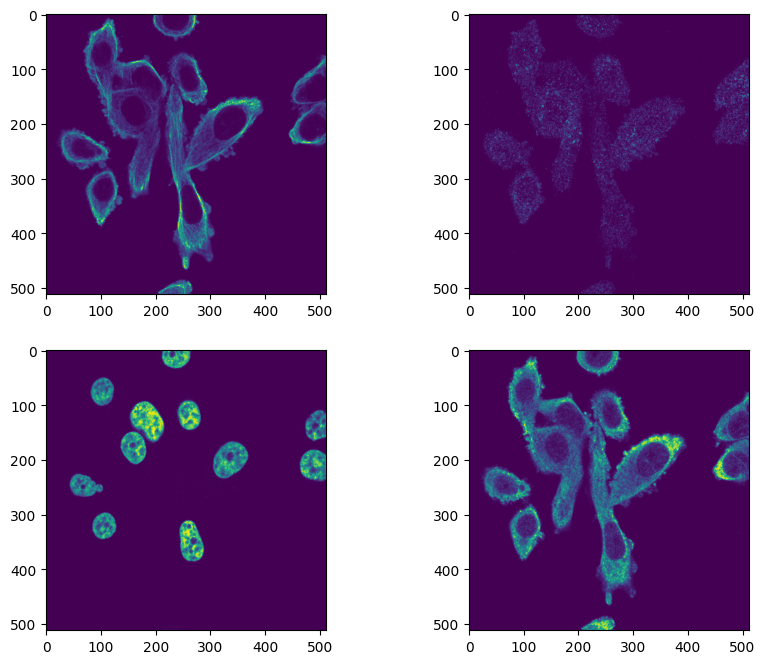

In [170]:
#train data after augmentation
fig, ax = plt.subplots(2,2,figsize = (10,8))

for image,_ in iter(train_dataloader):
    print('batch of image shapes: ',image.shape)
    print(image[0].shape)
    reorder_new_tensor = image[6].squeeze(2)
    print(reorder_new_tensor.shape)
    for i in range(2):
        for j in  range(2):
            ax[i][j].imshow(reorder_new_tensor[2*i+j,:,:])
    break

batch of image shapes:  torch.Size([16, 4, 512, 512])
torch.Size([4, 512, 512])
torch.Size([4, 512, 512])


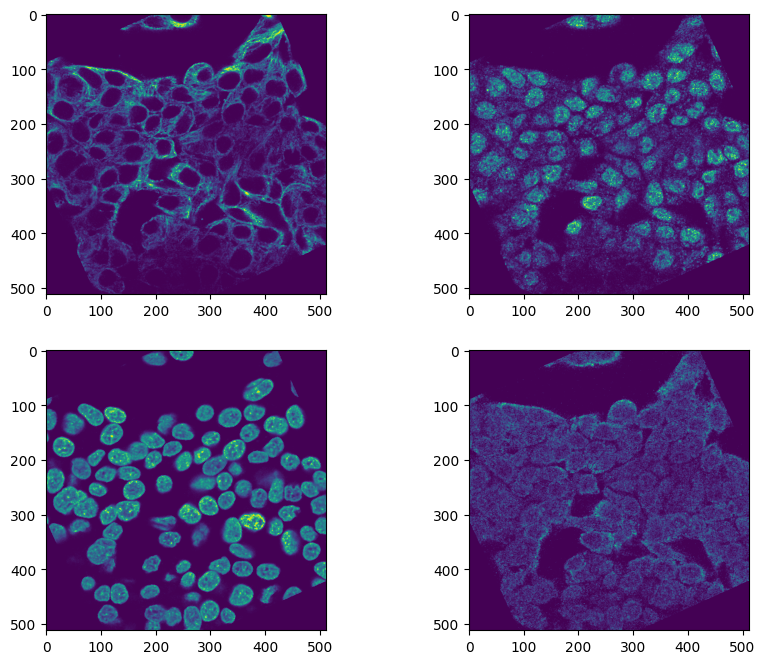

In [171]:
#val data after augmentation (no real augmantation)

fig, ax = plt.subplots(2,2,figsize = (10,8))

for image,_ in iter(train_dataloader):
    print('batch of image shapes: ',image.shape)
    print(image[0].shape)
    reorder_new_tensor = image[10].squeeze(2)
    print(reorder_new_tensor.shape)
    for i in range(2):
        for j in  range(2):
            ax[i][j].imshow(reorder_new_tensor[2*i+j,:,:])
    break

batch of image shapes:  torch.Size([16, 4, 512, 512])
torch.Size([4, 512, 512])
torch.Size([4, 512, 512])


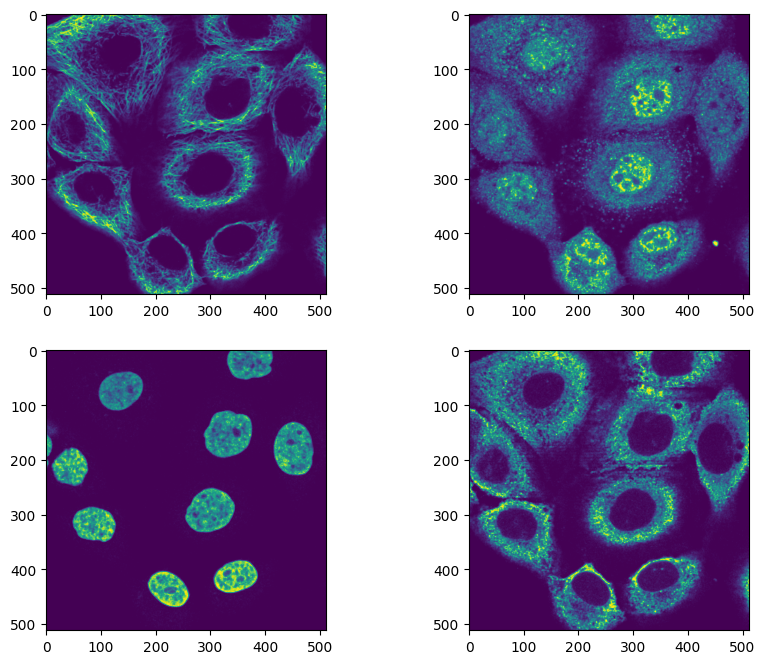

In [172]:
fig, ax = plt.subplots(2,2,figsize = (10,8))

for image in iter(test_dataloader):
    print('batch of image shapes: ',image.shape)
    print(image[0].shape)
    reorder_new_tensor = image[6].squeeze(2)
    print(reorder_new_tensor.shape)
    for i in range(2):
        for j in  range(2):
            ax[i][j].imshow(reorder_new_tensor[2*i+j,:,:])
    break

## Focal Loss

At the beginning, I was thinking that WeightedRandomSampler could work for me but I noticed that tuning of the rare components and also the common components is very challenging for me. After that, I decided to change my direction using FOCAL LOSS so that the model would focus on rare data by looking at the LOSS WHICH IS EXPLAINED IN DETAIL BELOW.

**What I understand from Focal Loss:**
* This example is basically cross entropy problem. But if I could apply BCE directly for my model in training phase, the BCE loss would reflect the same and equal effect on each protein no matter how much the protein reveals. This can be problematic because the BCE loss from common protein can manipulate the model. Also BCE loss for rear protein does not have any advantages.

* CHATGPT Comment:  In a more balanced (or "stable") dataset, where class frequencies are similar and you don't have severe imbalance, standard BCE (Binary Cross Entropy) would likely work well. The primary motivation for using focal loss is to mitigate the negative effects of class imbalance by reducing the contribution of easy, abundant examples and focusing more on the hard, rare ones.

* Focal Loss make sure that focuses on the rare samples. How it works like: that focal loss down-weights easy examples (from the common classes) so that the learning process emphasizes the rare or difficult ones. But the important key is that down weighting will be taken place without any manuel inputs except for gamma and alpha parameters (no manual per-sample weighting is required)

> Matematical Formulation;
> 
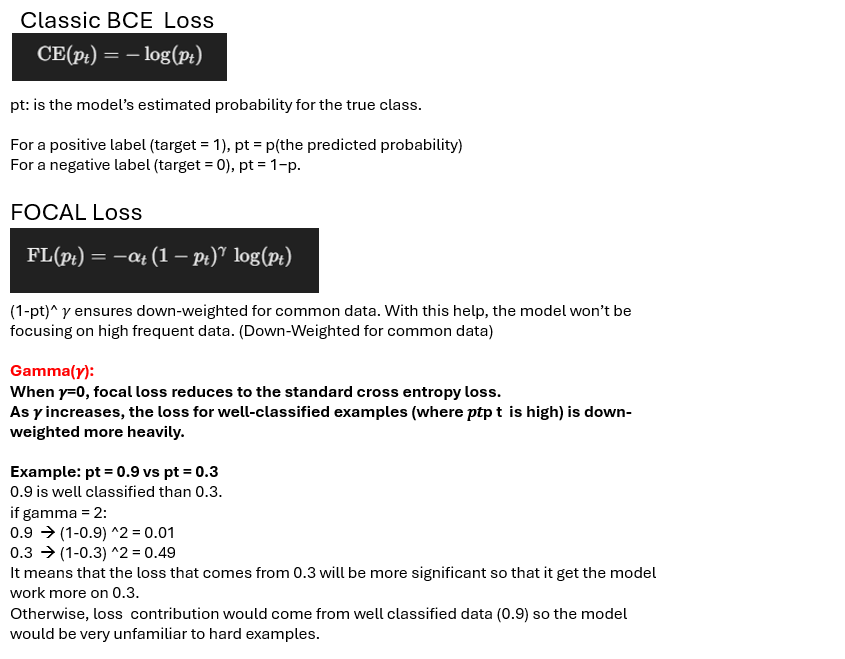

In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as F

'''
    how torch.sigmoid works:
    y_true = torch.tensor([0,1,0,1,1,1])
    torch.sigmoid(y_true)
    tensor([0.5000, 0.7311, 0.5000, 0.7311, 0.7311, 0.7311])
'''

'\n    how torch.sigmoid works:\n    y_true = torch.tensor([0,1,0,1,1,1])\n    torch.sigmoid(y_true)\n    tensor([0.5000, 0.7311, 0.5000, 0.7311, 0.7311, 0.7311])\n'

In [136]:
class FocalLoss(nn.Module):
  
    def __init__ (self,alpha=0.25, gamma=2.0, reduction='mean'):
        """
        Args:
            label (Tensor): y  --> torch.Size([batch_size, 28])
            pred (Tensor): output --> torch.Size([batch_size, 28])
        Returns:
            Tensor
        """
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, preds, labels):
            
        labels = labels.float()
        preds = preds.float()
    
        #Convert the labels to probabilities with sigmoid function
        probs = torch.sigmoid(preds)
        #If label is 1, select probability from probs. If not, then get 1-probs
        p_t = torch.where(labels  == 1, probs, 1 - probs)
        modulating_factor = (1 - p_t) ** self.gamma

        #'When labels is 1, the weight is alpha'
        #'When labels is 0, the weight is 1-alpha'
        if isinstance(self.alpha, (float, int)):
            alpha_factor = labels * self.alpha + (1 - labels) * (1 - self.alpha)
        else:
            # Assuming alpha is a tensor with shape (num_classes,). We need to expand it to match targets.
            self.alpha = self.alpha.view(1, -1)
            alpha_factor = labels * self.alpha +  (1 - labels) * (1 - self.alpha)

        # Compute binary cross entropy loss without reduction.
        ce_loss = F.binary_cross_entropy_with_logits(preds, labels, reduction='none')

        # Combine the factors to get focal loss:
        focal_loss_val = alpha_factor * modulating_factor * ce_loss
    
        # Apply the specified reduction.
        if self.reduction == 'mean':
            return focal_loss_val.mean()
        elif self.reduction == 'sum':
            return focal_loss_val.sum()
        else:
            return focal_loss_val

        return focal_loss_val

# Example usage:
y_true = torch.tensor([[0, 0, 0, 1, 1, 1],
                       [0, 0, 1, 1, 1, 1]])
y_pred = torch.tensor([[0.2, -0.5, 1.0, 0.7, 0.3, -1.2],
                       [0.1, 0.0, 1.2, 0.5, -0.2, 0.3]])
    
print(FocalLoss()(y_pred, y_true))


tensor(0.1167)


In [137]:
#this is the cross chech function that located in the main model. In training process, i needed to make sure my focal loss I wrote working as competible with the function from torchvision 
import torch
from torchvision.ops import sigmoid_focal_loss

loss = sigmoid_focal_loss(y_pred.float(), y_true.float(), alpha=0.25, gamma=2.0, reduction='mean')
print("Focal Loss:", loss.item())

Focal Loss: 0.11666544526815414


In [64]:
stopper!

SyntaxError: invalid syntax (<ipython-input-64-0fb455405490>, line 1)

**The Focal loss i created is validated with sigmoid_focal_loss methods that comes from torchvision.  It is matching right now!**

Keynote: If the train or validation data has remaining data that caused by not divided by batch size equally, then use drop_last = True

# Start defining the model 

## Starting wih Basic Model with Pytorch

In [191]:
import torch
import torch.nn as nn
from torchvision import models

class SimpleCNN(nn.Module):
    def __init__(self,num_classes =None):
        super(SimpleCNN,self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(4,64,kernel_size=3,stride=2,padding =1),
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.Conv2d(64,128,kernel_size=3,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2),
            nn.Dropout(0.3),

            nn.Conv2d(128,256,kernel_size = 5, padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2),
            nn.Dropout(0.5)
        )

        self.adaptive = nn.Sequential(
            nn.AdaptiveAvgPool2d((1,1)) #Global Average Pooling
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256,128),
            nn.Dropout(0.3),
            nn.ReLU(),
            nn.Linear(128,num_classes)
        )

    def forward(self,x):
        x = self.features(x)
        x = self.adaptive(x)
        x = self.classifier(x)
        return x

In [192]:
model = SimpleCNN(num_classes = 28)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
print(model)

SimpleCNN(
  (features): Sequential(
    (0): Conv2d(4, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.3, inplace=False)
    (8): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Dropout(p=0.5, inplace=False)
  )
  (adaptive): Sequential(
    (0): AdaptiveAvgPool2d(output_size=(1, 1))
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_

In [187]:
from torchsummary import summary
summary(model,input_size = (4,512,512),batch_size = 16)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [16, 64, 256, 256]           2,368
       BatchNorm2d-2         [16, 64, 256, 256]             128
              ReLU-3         [16, 64, 256, 256]               0
            Conv2d-4        [16, 128, 256, 256]          73,856
       BatchNorm2d-5        [16, 128, 256, 256]             256
              ReLU-6        [16, 128, 256, 256]               0
         MaxPool2d-7        [16, 128, 128, 128]               0
           Dropout-8        [16, 128, 128, 128]               0
            Conv2d-9        [16, 256, 126, 126]         819,456
      BatchNorm2d-10        [16, 256, 126, 126]             512
             ReLU-11        [16, 256, 126, 126]               0
        MaxPool2d-12          [16, 256, 63, 63]               0
          Dropout-13          [16, 256, 63, 63]               0
AdaptiveAvgPool2d-14            [16, 25

In [176]:
pip install torch-lr-finder

Note: you may need to restart the kernel to use updated packages.


  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 6.29E-03


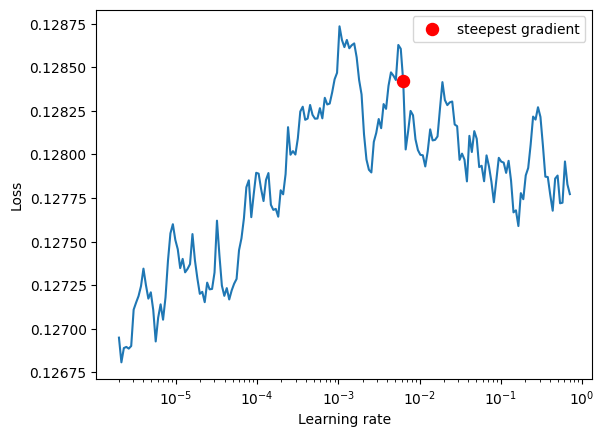

(<Axes: xlabel='Learning rate', ylabel='Loss'>, 0.006294988990221884)

In [183]:
from torch_lr_finder import LRFinder

#Finding best LR:

#Set an initial value for LR
optimizer = torch.optim.Adam(resnet.parameters(), lr=1e-6, weight_decay=1e-5)
criterion = FocalLoss(alpha = 0.25,gamma = 2.0, reduction = 'mean')
#create LR_FINDER
lr_finder = LRFinder(model,optimizer,criterion,device= 'cuda')
lr_finder.range_test(train_dataloader,end_lr =1,num_iter = 200) #from 1e-7 to 1 by 100 iteration

lr_finder.plot()


In [193]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
#for overall performance graph
train_loss_list = []
micro_f1_list = []
val_loss_list = []
num_epoch = 5
resnet = model
optimizer = torch.optim.Adam(resnet.parameters(), lr=1e-3, weight_decay=1e-4)
criterion = FocalLoss(alpha=0.25, gamma=2.0, reduction='mean')

for epoch in range(num_epoch):
    #Initiate the parameters
    
    total = 0   #calculation param
    
    running_loss = 0.0      #calculation parameter for train
    running_test_loss = 0.0 #calculation parameter for test
    train_total_samples = 0.0

    f1_micro = 0 
    f1_micro_total = 0

    resnet.train() #Set the model as training mode
    print('********  EPOCH NO {} ******** '.format(epoch))
   
    num_batches = 0
  #------------------ Train the Model ------------------
    for inputs,labels in train_dataloader:
        
        batch_size = inputs.size(0)         # e.g., 16
        num_classes = labels.size(1)        # e.g., 28

        #Remove the 3rd dimension of image which is Z.
        #inputs = inputs.permute(0,3,2,1)             # Shape: [16,512,512,4] to [16,4,512,512]
        
        #inputs = inputs.squeeze(3).permute(0,3,2,1)  # Shape: [16, 512, 512,1,4] to [16,4,512,512]
        inputs = inputs.to(torch.float).to(device, non_blocking=True)
        labels = labels.to(torch.float).to(device, non_blocking=True)
        #print(inputs.shape) #torch.Size([8, 4, 512, 512])
        #print(labels.shape) #torch.Size([8, 28])

        optimizer.zero_grad()
        outputs = resnet(inputs)

        #Loss Calculation
        loss = criterion(outputs,labels) #pred,target

        loss.backward()  #it is valid only for train (backpropagation)
        optimizer.step() #it is valid only for train (backpropagation)
        running_loss += loss.item() * batch_size 
        train_total_samples +=  batch_size   
        #print(running_loss / train_total_samples) #control
        
        probs = torch.sigmoid(outputs)
        thresholded_outputs  = (probs > 0.5).float()
        


        #F1 Score:
        f1_micro = f1_score(labels.cpu().numpy().flatten(), thresholded_outputs.cpu().numpy().flatten(), average='micro')
        f1_micro_total += f1_micro 

        
        num_batches +=1 
    
    # Calculate average loss and accuracy for the epoch
    epoch_loss = running_loss / train_total_samples
    train_loss_list.append(epoch_loss)
    print(f"Train Epoch {epoch + 1}/{num_epoch}: Train Loss: {epoch_loss:.4f} ")
    micro_per_class = f1_micro_total/num_batches
    micro_f1_list.append(micro_per_class)
    print(f"Train Epoch {epoch + 1}/{num_epoch}: F1Micro: {micro_per_class:.4f} ")
    

    resnet.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    val_total_samples = 0
    
    with torch.no_grad():  # Disable gradient computation for validation
        for inputs,labels in val_dataloader:
            batch_size = inputs.size(0)         # e.g., 16
            num_classes = labels.size(1)        # e.g., 28
           
            #inputs = inputs.squeeze(3).permute(0,3,2,1)  # Shape: [16, 512, 512,4]
            inputs = inputs.to(torch.float).to(device)

            labels = labels.to(torch.float).to(device)

            # Forward pass
            outputs = resnet(inputs)
            loss = criterion(outputs,labels) #pred,target

            # Accumulate validation loss
            val_running_loss += loss.item()* batch_size
            val_total_samples += batch_size
           

    # Calculate average validation loss and accuracy
    val_loss = val_running_loss / val_total_samples
    val_loss_list.append(val_loss)

    print(f"Validation Epoch{epoch}/{num_epoch}: Validation Loss: {val_loss:.4f}")

********  EPOCH NO 0 ******** 
Train Epoch 1/5: Train Loss: 0.0171 
Train Epoch 1/5: F1Micro: 0.9422 
Validation Epoch0/5: Validation Loss: 0.0164
********  EPOCH NO 1 ******** 
Train Epoch 2/5: Train Loss: 0.0162 
Train Epoch 2/5: F1Micro: 0.9427 
Validation Epoch1/5: Validation Loss: 0.0158
********  EPOCH NO 2 ******** 
Train Epoch 3/5: Train Loss: 0.0161 
Train Epoch 3/5: F1Micro: 0.9429 
Validation Epoch2/5: Validation Loss: 0.0159
********  EPOCH NO 3 ******** 
Train Epoch 4/5: Train Loss: 0.0161 
Train Epoch 4/5: F1Micro: 0.9430 
Validation Epoch3/5: Validation Loss: 0.0158
********  EPOCH NO 4 ******** 
Train Epoch 5/5: Train Loss: 0.0160 
Train Epoch 5/5: F1Micro: 0.9430 
Validation Epoch4/5: Validation Loss: 0.0159


## Start with Resnet50:

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

# Load a pre-trained ResNet model
resnet = models.resnet50(weights=None)

# Freeze all layers initially
#for param in resnet.parameters():
#    param.requires_grad = False

# Replace the final fully connected layer
num_classes = 28  # Example: for a 4-class classification problem
resnet.fc = nn.Sequential(
    nn.Linear(2048, 512),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    nn.Dropout(0.5),  # Optional: Helps prevent overfitting
    nn.Linear(512, 128),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    nn.Dropout(0.3),  # Optional: Helps prevent overfitting
    nn.Linear(128, num_classes)
)

# Unfreeze upper layers (optional)
#for param in resnet.layer4.parameters():  # Unfreeze the last residual block
#    param.requires_grad = True

print(resnet)

In [ ]:
for name,param in resnet.named_parameters():
  print(f'Layer: {name}')
  print(f' - Shape: {param.shape}')
  print(f' - Requires Grad: {param.requires_grad}')

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()
torch.manual_seed(42)
torch.cuda.manual_seed(42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
resnet = resnet.to(device)

if torch.cuda.is_available(): #if GPU is working
    print('GPU is active',torch.cuda.get_device_name(0))
    #move the model to GPU
else:
    print('GPU is not available')

optimizer = torch.optim.Adam(resnet.parameters(), lr=5e-3, weight_decay=1e-5)

#early stop setup
patience = 5
best_loss = float('inf') #set it as infinite value
epochs_no_improve = 0    #counts if it is no improvements
early_stop = True       #trigger


**IMPORTANT**

The resnet50 is designed with 3 channels image, now i need to make it 4 otherwise,

**RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[16, 4, 512, 512] to have 3 channels, but got 4 channels instead**


In [ ]:
''' (EXAMPLE)
(conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
'''

resnet.conv1 = nn.Conv2d(4,64,kernel_size=7,
                      stride = 2,
                      padding = 3,
                      bias = False)

resnet = resnet.to(device)
print(resnet)

In [ ]:
pip install torchsummary 

In [ ]:
from torchsummary import summary
summary(resnet,input_size = (4,512,512),batch_size = 16)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

#for overall performance graph
train_loss_list = []
micro_f1_list = []
val_loss_list = []

num_epoch = 5
criterion = FocalLoss(alpha=0.25, gamma=2.0, reduction='mean')

for epoch in range(num_epoch):
    #Initiate the parameters
    
    total = 0   #calculation param
    
    running_loss = 0.0      #calculation parameter for train
    running_test_loss = 0.0 #calculation parameter for test
    train_total_samples = 0.0

    f1_micro = 0 
    f1_micro_total = 0

    resnet.train() #Set the model as training mode
    print('********  EPOCH NO {} ******** '.format(epoch))
   
    num_batches = 0
  #------------------ Train the Model ------------------
    for inputs,labels in train_dataloader:
        #print(f"Total number of batches in train_dataloader: {len(train_dataloader)}")
        
        batch_size = inputs.size(0)         # e.g., 16
        num_classes = labels.size(1)        # e.g., 28

        #Remove the 3rd dimension of image which is Z.
        inputs = inputs.squeeze(3).permute(0,3,2,1)  # Shape: [16, 512, 512,1,4] to [16,4,512,512]
        inputs = inputs.to(torch.float).to(device)
        labels = labels.to(torch.float).to(device)
        #print(inputs.shape) #torch.Size([8, 4, 512, 512])
        #print(labels.shape) #torch.Size([8, 28])

        optimizer.zero_grad()
        outputs = resnet(inputs)

        #Loss Calculation
        loss = criterion(outputs,labels) #pred,target
        #print('Loss:')
        #print(loss)
        #loss_checker = sigmoid_focal_loss(outputs.float(), labels.float(), alpha=0.25, gamma=2.0, reduction='sum')
        #print("Focal Loss_Checker:", loss_checker.item())

        loss.backward()  #it is valid only for train (backpropagation)
        optimizer.step() #it is valid only for train (backpropagation)
        running_loss += loss.item() * batch_size 
        train_total_samples +=  batch_size   
        #print(running_loss / train_total_samples) #control
        
        probs = torch.sigmoid(outputs)
        thresholded_outputs  = (probs > 0.5).float()
        
        #print('predicted:',thresholded_outputs[0]) # 0,0,1,...etc....
        #print('actual:',labels[0])
        #print('outputs:')
        #print(outputs)

        #F1 Score:
        f1_micro = f1_score(labels.cpu().numpy().flatten(), thresholded_outputs.cpu().numpy().flatten(), average='micro')
        f1_micro_total += f1_micro 
        #print('f1_control',f1_micro_total/num_batches)
        
        num_batches +=1 
    
    # Calculate average loss and accuracy for the epoch
    epoch_loss = running_loss / train_total_samples
    train_loss_list.append(epoch_loss)
    print(f"Train Epoch {epoch + 1}/{num_epoch}: Train Loss: {epoch_loss:.4f} ")
    micro_per_class = f1_micro_total/num_batches
    micro_f1_list.append(micro_per_class)
    print(f"Train Epoch {epoch + 1}/{num_epoch}: F1Micro: {micro_per_class:.4f} ")
    

    resnet.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    val_total_samples = 0
    
    with torch.no_grad():  # Disable gradient computation for validation
        for inputs,labels in val_dataloader:
            batch_size = inputs.size(0)         # e.g., 16
            num_classes = labels.size(1)        # e.g., 28
           
            inputs = inputs.squeeze(3).permute(0,3,2,1)  # Shape: [16, 512, 512,4]
            inputs = inputs.to(torch.float).to(device)

            labels = labels.to(torch.float).to(device)

            # Forward pass
            outputs = resnet(inputs)
            loss = criterion(outputs,labels) #pred,target

            # Accumulate validation loss
            val_running_loss += loss.item()* batch_size
            val_total_samples += batch_size
           

    # Calculate average validation loss and accuracy
    val_loss = val_running_loss / val_total_samples
    val_loss_list.append(val_loss)

    print(f"Validation Epoch{epoch}/{num_epoch}: Validation Loss: {val_loss:.4f}")

## Model Changing Decision:

I noticed that resnet50 with unfreeze/freeze parameters are working heavy and also prone to be overfitted. The trainable parameters 24m which is more than the need of this problem (I am assuming for sure!). Also, I can see this by looking at the results as below:

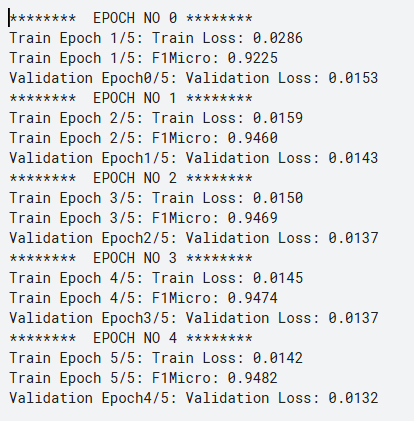

Now I want to change the model with more basic structure and less parameters.

just so an example:

>(conv1): Conv2d(4, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
>
>(bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
>
>(relu): ReLU(inplace=True)
>
>(maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
>
>(layer1): Sequential(

In [ ]:
'''
Built by Keras Based CNN Model

import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

# creating CNN model:

cnn_model = Sequential()

#train dataloader gives --> torch.Size([16, 512, 512, 1, 4])
# with torch squeeze, i would expect -->  [16,4,512,512]
#Conv_InputLayer
cnn_model.add(Input(shape=(4,512,512))) #keras automatically understand the batch size that comes from torch tensor
cnn_model.add(Conv2D(32,kernel_size=(3,3), strides = (2,2),padding ='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(BatchNormalization())

#------------------basic detail/feature (kernel_size=(small,small))
#Conv_layer1
cnn_model.add(Conv2D(32,kernel_size=(3,3),padding ='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.2))
#Conv_layer2
cnn_model.add(Conv2D(32,kernel_size = (3,3),padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.2))

#------------------Medium detail/feature (kernel_size=(medium,medium))
#Conv_layer3
cnn_model.add(Conv2D(64,kernel_size=(5,5),padding ='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(0,3))

#Conv_layer4
cnn_model.add(Conv2D(64,kernel_size=(5,5),padding ='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0,3))

#------------------Hard detail/feature (kernel_size=(big,big))
#Conv_layer5
cnn_model.add(Conv2D(128,kernel_size=(5,5),padding ='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.5))

#Conv_layer6
cnn_model.add(Conv2D(128,kernel_size=(5,7),padding ='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.5))

#Conv_layer7
cnn_model.add(Conv2D(128,kernel_size=(7,5),padding ='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.5))

cnn_model.add(Flatten())

#FC_Layer_1
cnn_model.add(Dense(128))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.5))
#FC_Layer_2
cnn_model.add(Dense(64))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.5))
#FC_Layer_3
cnn_model.add(Dense(28))
cnn_model.add(Activation('softmax')) #probability


'''

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class MyCNN(nn.Module):
    def __init__(self, num_classes=28):
        super(MyCNN, self).__init__()
        
        # Conv Input Layer (More Filters)
        self.conv1 = nn.Conv2d(in_channels=4, out_channels=64, kernel_size=3, stride=2, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        
        # Basic Detail Features
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.drop2 = nn.Dropout(0.1)

        self.residual3 = nn.Conv2d(64,128,kernel_size = 1, stride=1)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.drop3 = nn.Dropout(0.1)
        
        # Medium Detail Features
        self.conv4 = nn.Conv2d(128, 128, kernel_size=5, padding=2)
        self.bn4 = nn.BatchNorm2d(128)
        self.pool4 = nn.MaxPool2d(kernel_size=2)
        self.drop4 = nn.Dropout(0.2)

        self.conv5 = nn.Conv2d(128, 128, kernel_size=5, padding=2)
        self.bn5 = nn.BatchNorm2d(128)
        self.drop5 = nn.Dropout(0.3)

        self.residual6 = nn.Conv2d(128,256,kernel_size = 1, stride=1)
        
        # Hard Detail Features
        self.conv6 = nn.Conv2d(128, 256, kernel_size=5, padding=2)
        self.bn6 = nn.BatchNorm2d(256)
        #self.pool6 = nn.MaxPool2d(kernel_size=2)
        self.drop6 = nn.Dropout(0.4)

        self.conv7 = nn.Conv2d(256, 256, kernel_size=(5,7), padding=(2,3))
        self.bn7 = nn.BatchNorm2d(256)
        self.pool7 = nn.MaxPool2d(kernel_size=2)
        self.drop7 = nn.Dropout(0.3)

        self.conv8 = nn.Conv2d(256, 256, kernel_size=(7,5), padding=(3,2))
        self.bn8 = nn.BatchNorm2d(256)
        self.pool8 = nn.MaxPool2d(kernel_size=2)
        self.drop8 = nn.Dropout(0.3)

        # Adaptive pooling to handle dynamic input sizes
        self.global_pool = nn.AdaptiveAvgPool2d((1, 1))

        # Fully Connected Layers (Increased Size)
        self.fc1 = nn.Linear(256, 256)
        self.bn_fc1 = nn.BatchNorm1d(256)
        self.drop_fc1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(256, 128)
        self.bn_fc2 = nn.BatchNorm1d(128)
        self.drop_fc2 = nn.Dropout(0.2)

        self.fc3 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.to(device)  # Ensure input is moved to GPU
        x = F.relu(self.bn1(self.conv1(x)))

        x = F.relu(self.bn2(self.conv2(x)))
        x = self.drop2(x)

        residual = x  # Store original input BEFORE conv3
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.drop3(x)
        # If residual shape doesn't match, apply 1x1 conv to match channels
        if residual.shape[1] != x.shape[1]:  # Check if channels differ
            residual =  self.residual3(residual)  # Match channels 64 → 128
        x = x + residual  # Now both tensors have 128 channels

        
        x = x + residual  # Add skip connection

        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool4(x)
        x = self.drop4(x)

        x = F.relu(self.bn5(self.conv5(x)))
        x = self.drop5(x)

        residual =  x  # Store original input BEFORE conv3
        x = F.relu(self.bn6(self.conv6(x)))
        #x = self.pool6(x)
        x = self.drop6(x)
        if residual.shape[1] != x.shape[1]:  # Check if channels differ
            residual = self.residual6(residual)  # Match channels 128 → 256
        x = x + residual  # Skip connection

        x = F.relu(self.bn7(self.conv7(x)))
        x = self.pool7(x)
        x = self.drop7(x)

        x = F.relu(self.bn8(self.conv8(x)))
        x = self.pool8(x)
        x = self.drop8(x)

        # Global Pooling
        x = self.global_pool(x)
        
        # Flatten
        x = torch.flatten(x, start_dim=1)

        # Fully Connected Layers
        x = F.relu(self.bn_fc1(self.fc1(x)))
        x = self.drop_fc1(x)

        x = F.relu(self.bn_fc2(self.fc2(x)))
        x = self.drop_fc2(x)

        x = self.fc3(x)  # No activation since softmax is handled by loss function

        return x

# Move model to GPU
model = MyCNN(num_classes=28).to(device)
print(model)


In [ ]:
from torchsummary import summary

resnet = MyCNN(num_classes=28).to(device)
summary(resnet,input_size = (4,512,512),batch_size = 16)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
#for overall performance graph
train_loss_list = []
micro_f1_list = []
val_loss_list = []
num_epoch = 5
optimizer = torch.optim.Adam(resnet.parameters(), lr=1e-4, weight_decay=1e-5)
resnet = model
criterion = FocalLoss(alpha=0.25, gamma=2.0, reduction='mean')

for epoch in range(num_epoch):
    #Initiate the parameters
    
    total = 0   #calculation param
    
    running_loss = 0.0      #calculation parameter for train
    running_test_loss = 0.0 #calculation parameter for test
    train_total_samples = 0.0

    f1_micro = 0 
    f1_micro_total = 0

    resnet.train() #Set the model as training mode
    print('********  EPOCH NO {} ******** '.format(epoch))
   
    num_batches = 0
  #------------------ Train the Model ------------------
    for inputs,labels in train_dataloader:
        #print(f"Total number of batches in train_dataloader: {len(train_dataloader)}")
        
        batch_size = inputs.size(0)         # e.g., 16
        num_classes = labels.size(1)        # e.g., 28

        #Remove the 3rd dimension of image which is Z.
        inputs = inputs.squeeze(3).permute(0,3,2,1)  # Shape: [16, 512, 512,1,4] to [16,4,512,512]
        inputs = inputs.to(torch.float).to(device, non_blocking=True)
        labels = labels.to(torch.float).to(device, non_blocking=True)
        #print(inputs.shape) #torch.Size([8, 4, 512, 512])
        #print(labels.shape) #torch.Size([8, 28])

        optimizer.zero_grad()
        outputs = resnet(inputs)

        #Loss Calculation
        loss = criterion(outputs,labels) #pred,target
        #print('Loss:')
        #print(loss)
        #loss_checker = sigmoid_focal_loss(outputs.float(), labels.float(), alpha=0.25, gamma=2.0, reduction='sum')
        #print("Focal Loss_Checker:", loss_checker.item())

        loss.backward()  #it is valid only for train (backpropagation)
        optimizer.step() #it is valid only for train (backpropagation)
        running_loss += loss.item() * batch_size 
        train_total_samples +=  batch_size   
        #print(running_loss / train_total_samples) #control
        
        probs = torch.sigmoid(outputs)
        thresholded_outputs  = (probs > 0.5).float()
        
        #print('predicted:',thresholded_outputs[0]) # 0,0,1,...etc....
        #print('actual:',labels[0])
        #print('outputs:')
        #print(outputs)

        #F1 Score:
        f1_micro = f1_score(labels.cpu().numpy().flatten(), thresholded_outputs.cpu().numpy().flatten(), average='micro')
        f1_micro_total += f1_micro 
        #print('f1_control',f1_micro_total/num_batches)
        
        num_batches +=1 
    
    # Calculate average loss and accuracy for the epoch
    epoch_loss = running_loss / train_total_samples
    train_loss_list.append(epoch_loss)
    print(f"Train Epoch {epoch + 1}/{num_epoch}: Train Loss: {epoch_loss:.4f} ")
    micro_per_class = f1_micro_total/num_batches
    micro_f1_list.append(micro_per_class)
    print(f"Train Epoch {epoch + 1}/{num_epoch}: F1Micro: {micro_per_class:.4f} ")
    

    resnet.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    val_total_samples = 0
    
    with torch.no_grad():  # Disable gradient computation for validation
        for inputs,labels in val_dataloader:
            batch_size = inputs.size(0)         # e.g., 16
            num_classes = labels.size(1)        # e.g., 28
           
            inputs = inputs.squeeze(3).permute(0,3,2,1)  # Shape: [16, 512, 512,4]
            inputs = inputs.to(torch.float).to(device)

            labels = labels.to(torch.float).to(device)

            # Forward pass
            outputs = resnet(inputs)
            loss = criterion(outputs,labels) #pred,target

            # Accumulate validation loss
            val_running_loss += loss.item()* batch_size
            val_total_samples += batch_size
           

    # Calculate average validation loss and accuracy
    val_loss = val_running_loss / val_total_samples
    val_loss_list.append(val_loss)

    print(f"Validation Epoch{epoch}/{num_epoch}: Validation Loss: {val_loss:.4f}")

## Saving the model

In [ ]:
# Save the entire model
model_path = '/kaggle/working/full_model.pth'
torch.save(resnet, model_path)

## Testing the model

In [195]:
resnet = model  # pay attention which model will assign here!
resnet.eval()  # Set the model to evaluation mode
predictions = []

with torch.no_grad():  # Disable gradient computation for validation
    for inputs in test_dataloader:
        #batch_size = inputs.size(0)         # e.g., 16
        #inputs = inputs.squeeze(3).permute(0,3,2,1)  # Shape: [16, 512, 512,4]
        inputs = inputs.to(torch.float).to(device)

        outputs = resnet(inputs)
        probs = torch.sigmoid(outputs)
        thresholded_outputs  = (probs > 0.35).float()
        predictions.append(thresholded_outputs.cpu().numpy())


In [196]:
predf = np.concatenate(predictions)

In [ ]:
predf[:10]

In [197]:
predc = []

for each in predf:
    tmp=[]
    for idx in range(len(each)):
        if each[idx] ==1:
            tmp.append(idx)
    predc.append(tmp)

In [198]:
predc[:10]

[[0], [], [0, 21, 25], [0], [0, 25], [0], [0, 25], [0, 25], [0], [0, 25]]

## Submitting the test data

In [199]:
temporary_predc = predc
new_arr = []
for each in temporary_predc:
    if isinstance(each,list):  # if the prediction is packed in list,then search deeper.
        if len(each) == 0:     #if the prediction is not existed.
            new_arr.append('') #save empty
        elif len(each) == 1:
            new_arr.append(str(each[0])) #save the only one value into new array 
        else:
            tmp = []
            for idx in range(len(each)): #search each element then pack it into list
                tmp.append(str(each[idx]))
            new_arr.append(' '.join(tmp)) #form the list as str [1,3,5] to str(1,3,5) then save it
    else:
        new_arr.append(each) # if the prediction is out of list, then save the row value.
        

In [200]:
dtest = pd.read_csv('/kaggle/input/human-protein-atlas-image-classification/sample_submission.csv')

In [ ]:
new_arr[:10]

In [201]:
dtest['Predicted'] = new_arr

In [202]:
dtest.to_csv('/kaggle/working/prediction_r.csv')